# Quick Demo: Reference-free spatial omics simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import simspace as ss

In [2]:
# Step 1: Generate random parameters for the simulation. The random parameters will define the characteristics of the spatial omics simulation.
# Here, we generate parameters for 3 groups (niches) and 8 states (cell types), with a fixed seed for reproducibility.
# The parameters include information about the spatial structure, such as the number of groups, states, and other simulation settings.

params = ss.util.generate_random_parameters(
    n_group=3,
    n_state=8,
    seed=42,
)

In [ ]:
# Step 2: Create a spatial simulation using the generated parameters.
# The shape of the simulation is set to (100, 100), meaning a 100x100 grid.
# The custom_neighbor argument specifies the spatial connectivity, using Manhattan distance offsets for neighbors.
# One can check the spatial connectivity by sim.neighborhood
# The seed is set to 42 for reproducibility.
sim = ss.util.sim_from_params(
    parameters=params,
    shape=(100, 100),
    custom_neighbor=ss.spatial.generate_offsets(3, method='manhattan'),
    seed=42,
)

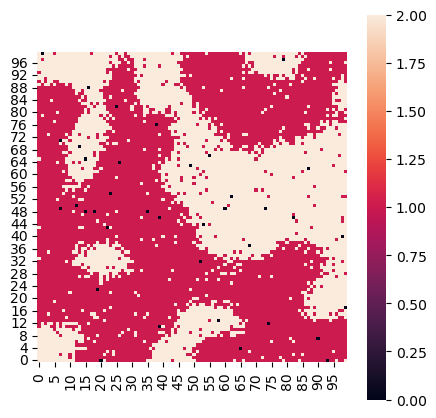

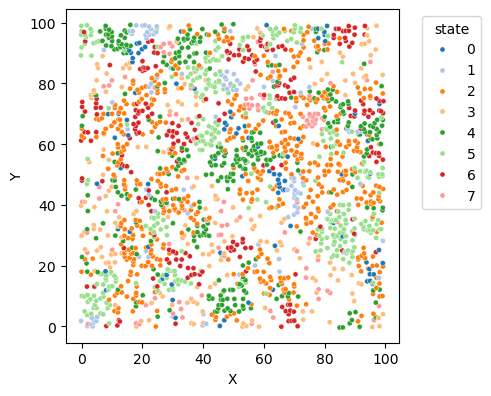

In [ ]:
# Step 3: Visualize the spatial simulation.
# The simulation can be visualized using the plot_niche method, which shows the spatial distribution of different niches.
sim.plot_niche(figsize=(5, 5), dpi=100)
# The plot method can be used to visualize the entire simulation, including the spatial distribution of states.
sim.plot(figsize=(5, 5), dpi=100, size=14)

In [ ]:
# Step 4 (Optional): Simulate omics data based on the spatial simulation.
# The create_omics method generates omics data with specified parameters.
# Here, we create 100 genes with a background ratio of 0.6 and a ligand-receptor ratio of 0.2.
# The background and marker parameters define the distribution of gene expression levels.
# The spatial argument is set to False, indicating that the omics data is not spatially dependent.
# The generated omics data can be used for further analysis or visualization.
sim.create_omics(
    n_genes=100, 
    bg_ratio=0.6, 
    lr_ratio=0.2,
    bg_param = (1, 0.5), 
    marker_param = (5, 1.6), 
    spatial=False)

sim.gene_meta.head()

,GeneID,Marker,LRindex,Type_0,Type_1,Type_2,Type_3,Type_4,Type_5,Type_6,Type_7
0,0,6,-1,0.026426,0.163313,1.194430,0.136930,0.078265,0.336136,12.154214,0.138572
1,1,-1,-1,0.651374,0.229261,0.500252,0.501919,0.383693,0.047315,0.901822,0.193405
2,2,-1,-1,0.103216,0.020815,0.446889,0.565926,0.008363,0.358815,0.128412,0.518062
3,3,-1,-1,0.095802,0.587106,0.244479,1.380172,0.073972,0.208566,0.060222,1.293095
4,4,2,39,1.049167,0.149164,10.378855,0.849742,0.405066,0.377140,0.138439,0.048863


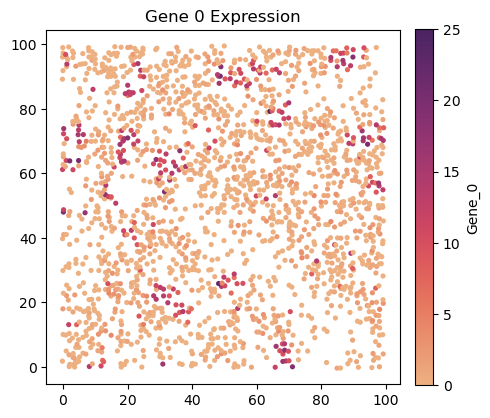

In [9]:
ss.plot.plot_gene(
    sim.meta, sim.omics['Gene_0'], size=14, 
    figsize=(5,5), dpi=100, title='Gene 0 Expression',
    )